# Physical Activity Prediction

In [1]:
#EDA Packages
import pandas as pd
import numpy as np

In [2]:
# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the dataset
df=pd.read_csv('sampled_dataset.csv')

In [4]:
df.head(10)

,Unnamed: 0,activityID,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,...,ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z,PeopleId
0,1245151,descending stairs,116.0,32.6875,-7.33257,5.25923,3.183940,-0.925192,0.560706,1.067460,...,9.90579,1.313200,-1.196200,-0.002472,0.685765,-0.650120,-70.820400,7.96099,25.82870,4
1,698562,transient activities,117.0,30.6875,1.84982,9.75122,0.188855,-0.029437,-0.146707,0.023528,...,9.61159,-1.907980,-1.719480,0.007796,-0.009811,0.019263,-54.016500,12.79440,5.84812,2
2,1000735,descending stairs,145.0,32.1250,-4.55761,-4.27370,4.566240,1.367570,-0.215928,0.016142,...,14.30240,3.394320,5.627740,-3.233990,0.015305,6.615370,-41.720600,-11.26740,15.64080,3
3,51545,sitting,93.0,32.6250,-7.91338,4.09584,4.102860,-0.007404,0.014535,-0.026129,...,9.11480,0.998793,-3.942220,-0.003058,-0.052865,-0.013466,-85.337800,38.25840,16.03060,1
4,71289,standing,103.0,33.1250,-7.69006,5.06814,2.717380,0.142284,-0.083325,-0.001429,...,9.61089,-2.260700,-0.366664,-0.025595,0.010960,0.025672,-109.734000,-31.58710,23.40700,1
5,2195558,standing,71.0,32.5000,-5.41973,8.45011,1.046540,-0.329486,-0.021005,0.012804,...,9.75657,0.145877,-2.270990,0.039430,-0.032153,0.012047,-0.257292,-6.03105,10.91710,7
6,1022930,transient activities,136.0,31.4375,-11.88720,3.33944,5.123540,-1.048260,-0.778553,1.311740,...,6.81100,5.664510,-1.640840,1.111290,-1.387130,-2.203510,-23.469900,29.35710,15.18210,3
7,924879,ironing,85.0,32.6875,-2.94632,6.92175,6.246050,0.496330,-1.018600,-0.836692,...,9.53600,-0.983964,-3.230980,0.033943,0.090504,-0.008873,-26.816000,19.95370,42.95940,3
8,1489501,standing,91.0,35.2500,-8.82236,3.18362,3.130140,-1.453440,0.615182,1.196020,...,9.79151,-0.119819,-2.307580,0.264440,-0.291589,-0.013426,-2.254130,-7.40395,35.44860,5
9,1340879,Nordic walking,116.0,29.7500,-5.40830,7.66743,2.627330,0.555239,-0.349281,0.666363,...,22.17480,11.612600,-7.192860,2.172640,-0.456929,6.049330,-39.699900,11.18730,30.89860,4


In [5]:

dataset=df.drop(columns=['Unnamed: 0'])

In [6]:
dataset.head(5)

,activityID,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,...,ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z,PeopleId
0,descending stairs,116.0,32.6875,-7.33257,5.25923,3.183940,-0.925192,0.560706,1.067460,30.60340,...,9.90579,1.313200,-1.196200,-0.002472,0.685765,-0.650120,-70.8204,7.96099,25.82870,4
1,transient activities,117.0,30.6875,1.84982,9.75122,0.188855,-0.029437,-0.146707,0.023528,-10.64160,...,9.61159,-1.907980,-1.719480,0.007796,-0.009811,0.019263,-54.0165,12.79440,5.84812,2
2,descending stairs,145.0,32.1250,-4.55761,-4.27370,4.566240,1.367570,-0.215928,0.016142,29.62470,...,14.30240,3.394320,5.627740,-3.233990,0.015305,6.615370,-41.7206,-11.26740,15.64080,3
3,sitting,93.0,32.6250,-7.91338,4.09584,4.102860,-0.007404,0.014535,-0.026129,-2.09573,...,9.11480,0.998793,-3.942220,-0.003058,-0.052865,-0.013466,-85.3378,38.25840,16.03060,1
4,standing,103.0,33.1250,-7.69006,5.06814,2.717380,0.142284,-0.083325,-0.001429,56.44470,...,9.61089,-2.260700,-0.366664,-0.025595,0.010960,0.025672,-109.7340,-31.58710,23.40700,1


In [7]:
print ('Shape of the given dataset is {}.Contains {} rows and {} columns '.format(dataset.shape,dataset.shape[0],dataset.shape[1]))

Shape of the given dataset is (358007, 33).Contains 358007 rows and 33 columns 


# Feature Names and its Datatypes

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358007 entries, 0 to 358006
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   activityID                 358007 non-null  object 
 1   heart_rate                 357998 non-null  float64
 2   hand temperature (°C)      358007 non-null  float64
 3   hand acceleration X ±16g   358007 non-null  float64
 4   hand acceleration Y ±16g   358007 non-null  float64
 5   hand acceleration Z ±16g   358007 non-null  float64
 6   hand gyroscope X           358007 non-null  float64
 7   hand gyroscope Y           358007 non-null  float64
 8   hand gyroscope Z           358007 non-null  float64
 9   hand magnetometer X        358007 non-null  float64
 10  hand magnetometer Y        358007 non-null  float64
 11  hand magnetometer Z        358007 non-null  float64
 12  chest temperature (°C)     358007 non-null  float64
 13  chest acceleration X ±16g  35

# Data Spliting
#Select and separately store Numerical and Categorical features in different variables.

In [9]:

##Selecting numerical features
numerical_data = dataset.select_dtypes(include='number')
#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 32 numerical features: 

['heart_rate', 'hand temperature (°C)', 'hand acceleration X ±16g', 'hand acceleration Y ±16g', 'hand acceleration Z ±16g', 'hand gyroscope X', 'hand gyroscope Y', 'hand gyroscope Z', 'hand magnetometer X', 'hand magnetometer Y', 'hand magnetometer Z', 'chest temperature (°C)', 'chest acceleration X ±16g', 'chest acceleration Y ±16g', 'chest acceleration Z ±16g', 'chest gyroscope X', 'chest gyroscope Y', 'chest gyroscope Z', 'chest magnetometer X', 'chest magnetometer Y', 'chest magnetometer Z', 'ankle temperature (°C)', 'ankle acceleration X ±16g', 'ankle acceleration Y ±16g', 'ankle acceleration Z ±16g', 'ankle gyroscope X', 'ankle gyroscope Y', 'ankle gyroscope Z', 'ankle magnetometer X', 'ankle magnetometer Y', 'ankle magnetometer Z', 'PeopleId']


In [10]:
#Selecting categoricalfeatures
categorical_data=dataset.select_dtypes(include= 'object')
#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 1 categorical features: 

['activityID']


# Descriptive Analysis
In descriptive Analysis we analysis each variable separately to get inference about the feature.


In [11]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
heart_rate,357998.0,109.798084,25.858938,57.00000,90.000000,108.000000,125.000000,202.00000
hand temperature (°C),358007.0,32.672485,1.800673,27.43750,31.437500,33.125000,34.000000,35.50000
hand acceleration X ±16g,358007.0,-4.972517,5.994604,-87.38930,-9.034770,-5.791870,-0.779855,46.74180
hand acceleration Y ±16g,358007.0,3.565986,6.228332,-70.29120,1.289225,3.568520,6.598675,147.31300
hand acceleration Z ±16g,358007.0,3.184533,3.810917,-61.45220,0.980801,2.969950,6.005750,67.00950
hand gyroscope X,358007.0,-0.005401,1.303069,-27.80440,-0.349345,-0.006426,0.301476,21.49750
hand gyroscope Y,358007.0,0.030632,0.886216,-22.21270,-0.197638,0.006098,0.236019,16.98350
hand gyroscope Z,358007.0,-0.006388,1.455918,-16.69970,-0.304771,-0.005185,0.296644,14.21840
hand magnetometer X,358007.0,21.230708,24.002555,-101.37300,5.313130,24.235500,39.255450,145.11900
hand magnetometer Y,358007.0,-14.308053,24.095573,-200.04300,-29.531550,-16.426400,1.745900,117.83200


In [12]:
#Summary satistics of Categorical features
categorical_data.describe(include='object').T

,count,unique,top,freq
activityID,358007,13,transient activities,116265


In [13]:
#Variance of each numerical features
numerical_data.var()

heart_rate                   668.684650
hand temperature (°C)          3.242424
hand acceleration X ±16g      35.935281
hand acceleration Y ±16g      38.792114
hand acceleration Z ±16g      14.523087
hand gyroscope X               1.697988
hand gyroscope Y               0.785379
hand gyroscope Z               2.119698
hand magnetometer X          576.122655
hand magnetometer Y          580.596642
hand magnetometer Z          421.622963
chest temperature (°C)         2.473145
chest acceleration X ±16g      2.594010
chest acceleration Y ±16g     17.776950
chest acceleration Z ±16g     17.402673
chest gyroscope X              0.158410
chest gyroscope Y              0.289216
chest gyroscope Z              0.085566
chest magnetometer X         270.402553
chest magnetometer Y         259.150015
chest magnetometer Z         395.515133
ankle temperature (°C)         1.393484
ankle acceleration X ±16g     31.672279
ankle acceleration Y ±16g     46.372655
ankle acceleration Z ±16g     12.486158


In [14]:
#Skew in numerical features
numerical_data.skew()

heart_rate                   0.600281
hand temperature (°C)       -0.811346
hand acceleration X ±16g    -0.308143
hand acceleration Y ±16g     1.844614
hand acceleration Z ±16g    -0.544136
hand gyroscope X             0.057980
hand gyroscope Y             0.537558
hand gyroscope Z            -0.224864
hand magnetometer X         -0.476491
hand magnetometer Y         -0.089258
hand magnetometer Z         -0.040068
chest temperature (°C)      -0.684210
chest acceleration X ±16g    0.180041
chest acceleration Y ±16g    1.604216
chest acceleration Z ±16g    0.305503
chest gyroscope X            2.673222
chest gyroscope Y           -0.034324
chest gyroscope Z           -0.092985
chest magnetometer X         0.215209
chest magnetometer Y         0.656713
chest magnetometer Z         0.096158
ankle temperature (°C)      -0.981662
ankle acceleration X ±16g    2.650161
ankle acceleration Y ±16g    0.294082
ankle acceleration Z ±16g   -0.747904
ankle gyroscope X            0.177283
ankle gyrosc

# Observation
## 1.Features such as ankle acceleration X,chest gyroscope X has high positive skew ranges.
## 2.And ankle gyroscope Y has high negative skew.
## 3.Rest of features shows moderate range of positive and negative skew.

# Histograms
To find the distributions and outlier in the each feature

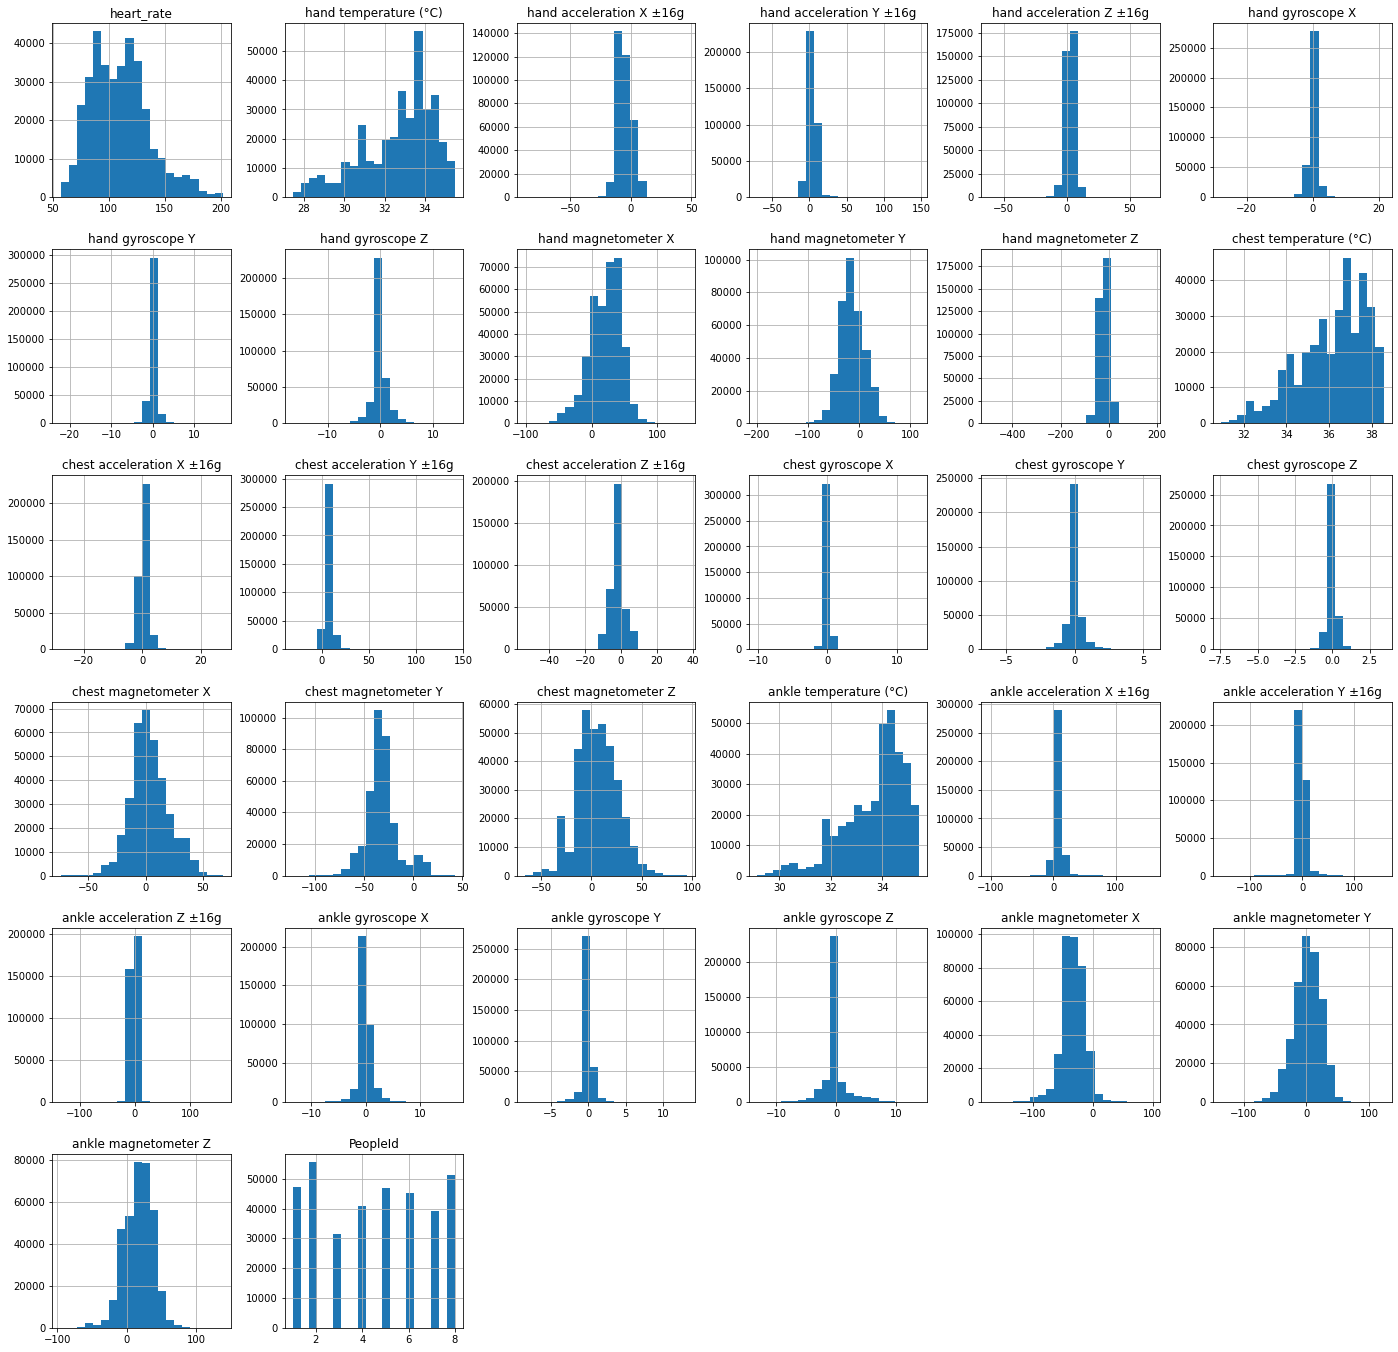

In [15]:
numerical_data.hist(figsize=(24,24),bins=20)
plt.show()

# Number Unique values in each feature

In [16]:
numerical_data.nunique()


heart_rate                     2913
hand temperature (°C)           145
hand acceleration X ±16g     289998
hand acceleration Y ±16g     302895
hand acceleration Z ±16g     297715
hand gyroscope X             338441
hand gyroscope Y             336296
hand gyroscope Z             335439
hand magnetometer X          293523
hand magnetometer Y          295110
hand magnetometer Z          286799
chest temperature (°C)          130
chest acceleration X ±16g    279031
chest acceleration Y ±16g    222908
chest acceleration Z ±16g    284045
chest gyroscope X            333877
chest gyroscope Y            337455
chest gyroscope Z            333169
chest magnetometer X         307026
chest magnetometer Y         236767
chest magnetometer Z         295927
ankle temperature (°C)          126
ankle acceleration X ±16g    199717
ankle acceleration Y ±16g    258559
ankle acceleration Z ±16g    243486
ankle gyroscope X            332045
ankle gyroscope Y            337003
ankle gyroscope Z           

In [17]:
#Missing Values
numerical_data.isnull().sum()


heart_rate                   9
hand temperature (°C)        0
hand acceleration X ±16g     0
hand acceleration Y ±16g     0
hand acceleration Z ±16g     0
hand gyroscope X             0
hand gyroscope Y             0
hand gyroscope Z             0
hand magnetometer X          0
hand magnetometer Y          0
hand magnetometer Z          0
chest temperature (°C)       0
chest acceleration X ±16g    0
chest acceleration Y ±16g    0
chest acceleration Z ±16g    0
chest gyroscope X            0
chest gyroscope Y            0
chest gyroscope Z            0
chest magnetometer X         0
chest magnetometer Y         0
chest magnetometer Z         0
ankle temperature (°C)       0
ankle acceleration X ±16g    0
ankle acceleration Y ±16g    0
ankle acceleration Z ±16g    0
ankle gyroscope X            0
ankle gyroscope Y            0
ankle gyroscope Z            0
ankle magnetometer X         0
ankle magnetometer Y         0
ankle magnetometer Z         0
PeopleId                     0
dtype: i

# Observations
## 1.hand temperature (°C), chest temperature (°C),ankle temperature (°C) contains mostly non-unique values but rest of the features show more variations.
## 2.heart_rate contains missing values so we need to use of any statistical imputations.
## 3. Except PeopleID all other features shows gaussian like distribution

# Categorical Features
No of unique values in each categorical feature

In [18]:

# unique values counts
unique_values=categorical_data.activityID.unique()

unique_values

array(['descending stairs', 'transient activities', 'sitting', 'standing',
       'ironing', 'Nordic walking', 'lying', 'walking', 'cycling',
       'running', 'ascending stairs', 'vacuum cleaning', 'rope jumping'],
      dtype=object)

In [19]:
unique_counts=categorical_data.nunique()
unique_counts

activityID    13
dtype: int64


activityID



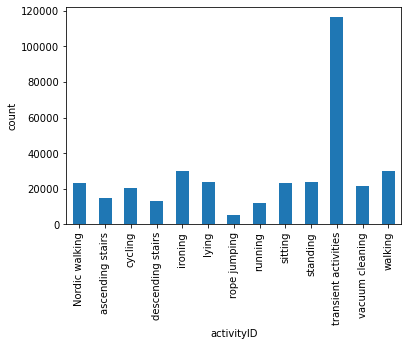

In [20]:
#Barplot of unique value counts in every categorical features
#through Looping generate bar plots of unqiue value counts in each variable
for col in categorical_features:
    print()
    print(f"\033[1m{col}\033[0m\n") #print column name above the plot
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=90, xlabel=col,ylabel='count')
    plt.show()

# Observations
From the barplots of unique values in each categorical features shows how balanced those unique values in that specific feature.

# Correlation Analysis
Correlation matrix of whole dataset

In [21]:

# Generating correlation coefficient between each features
from pandas import set_option
set_option("display.precision",3)
correlation=dataset.corr(method='pearson')
correlation

,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,hand magnetometer Y,...,ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z,PeopleId
heart_rate,1.000e+00,-3.724e-01,-0.190,2.758e-02,-0.210,6.051e-03,4.372e-02,-3.957e-03,0.202,-0.082,...,0.231,0.155,0.010,-1.492e-04,-0.021,0.003,-2.655e-01,-0.164,-6.676e-02,-0.120
hand temperature (°C),-3.724e-01,1.000e+00,0.013,-4.314e-02,0.062,-1.765e-02,-1.157e-02,1.819e-03,-0.067,-0.023,...,-0.043,-0.035,-0.075,1.292e-03,0.022,-0.001,8.334e-02,0.089,1.352e-01,0.172
hand acceleration X ±16g,-1.898e-01,1.301e-02,1.000,-2.268e-02,0.214,1.702e-02,-7.885e-02,2.838e-02,-0.580,-0.012,...,-0.249,-0.081,0.018,3.355e-02,-0.054,0.084,4.473e-02,0.165,-4.115e-02,-0.077
hand acceleration Y ±16g,2.758e-02,-4.314e-02,-0.023,1.000e+00,-0.086,1.408e-01,1.025e-04,2.408e-02,-0.091,-0.487,...,0.048,0.104,0.030,-9.640e-04,-0.025,-0.034,-7.897e-02,-0.097,3.590e-02,-0.357
hand acceleration Z ±16g,-2.097e-01,6.236e-02,0.214,-8.640e-02,1.000,-2.208e-02,-5.588e-03,-6.281e-02,-0.144,0.131,...,-0.153,-0.047,0.014,1.254e-02,-0.014,0.023,8.193e-02,0.067,-4.187e-02,0.032
hand gyroscope X,6.051e-03,-1.765e-02,0.017,1.408e-01,-0.022,1.000e+00,-2.008e-01,-2.218e-01,0.003,-0.012,...,0.018,0.009,-0.011,2.078e-02,-0.035,0.131,1.256e-02,-0.056,-3.259e-04,-0.020
hand gyroscope Y,4.372e-02,-1.157e-02,-0.079,1.025e-04,-0.006,-2.008e-01,1.000e+00,7.289e-02,-0.038,-0.008,...,0.043,0.003,-0.032,5.215e-02,0.087,-0.018,-8.145e-04,0.002,-1.898e-02,0.005
hand gyroscope Z,-3.957e-03,1.819e-03,0.028,2.408e-02,-0.063,-2.218e-01,7.289e-02,1.000e+00,-0.009,-0.023,...,-0.018,0.048,0.031,-3.340e-02,-0.018,-0.155,-5.180e-02,0.114,2.803e-02,-0.002
hand magnetometer X,2.024e-01,-6.670e-02,-0.580,-9.108e-02,-0.144,2.705e-03,-3.809e-02,-8.649e-03,1.000,0.133,...,0.150,0.106,0.018,3.663e-02,-0.072,0.043,-5.334e-02,-0.259,-1.253e-01,0.115
hand magnetometer Y,-8.242e-02,-2.321e-02,-0.012,-4.873e-01,0.131,-1.179e-02,-7.876e-03,-2.257e-02,0.133,1.000,...,-0.137,-0.070,-0.070,6.170e-02,-0.018,0.044,2.513e-01,0.106,-2.400e-01,0.383


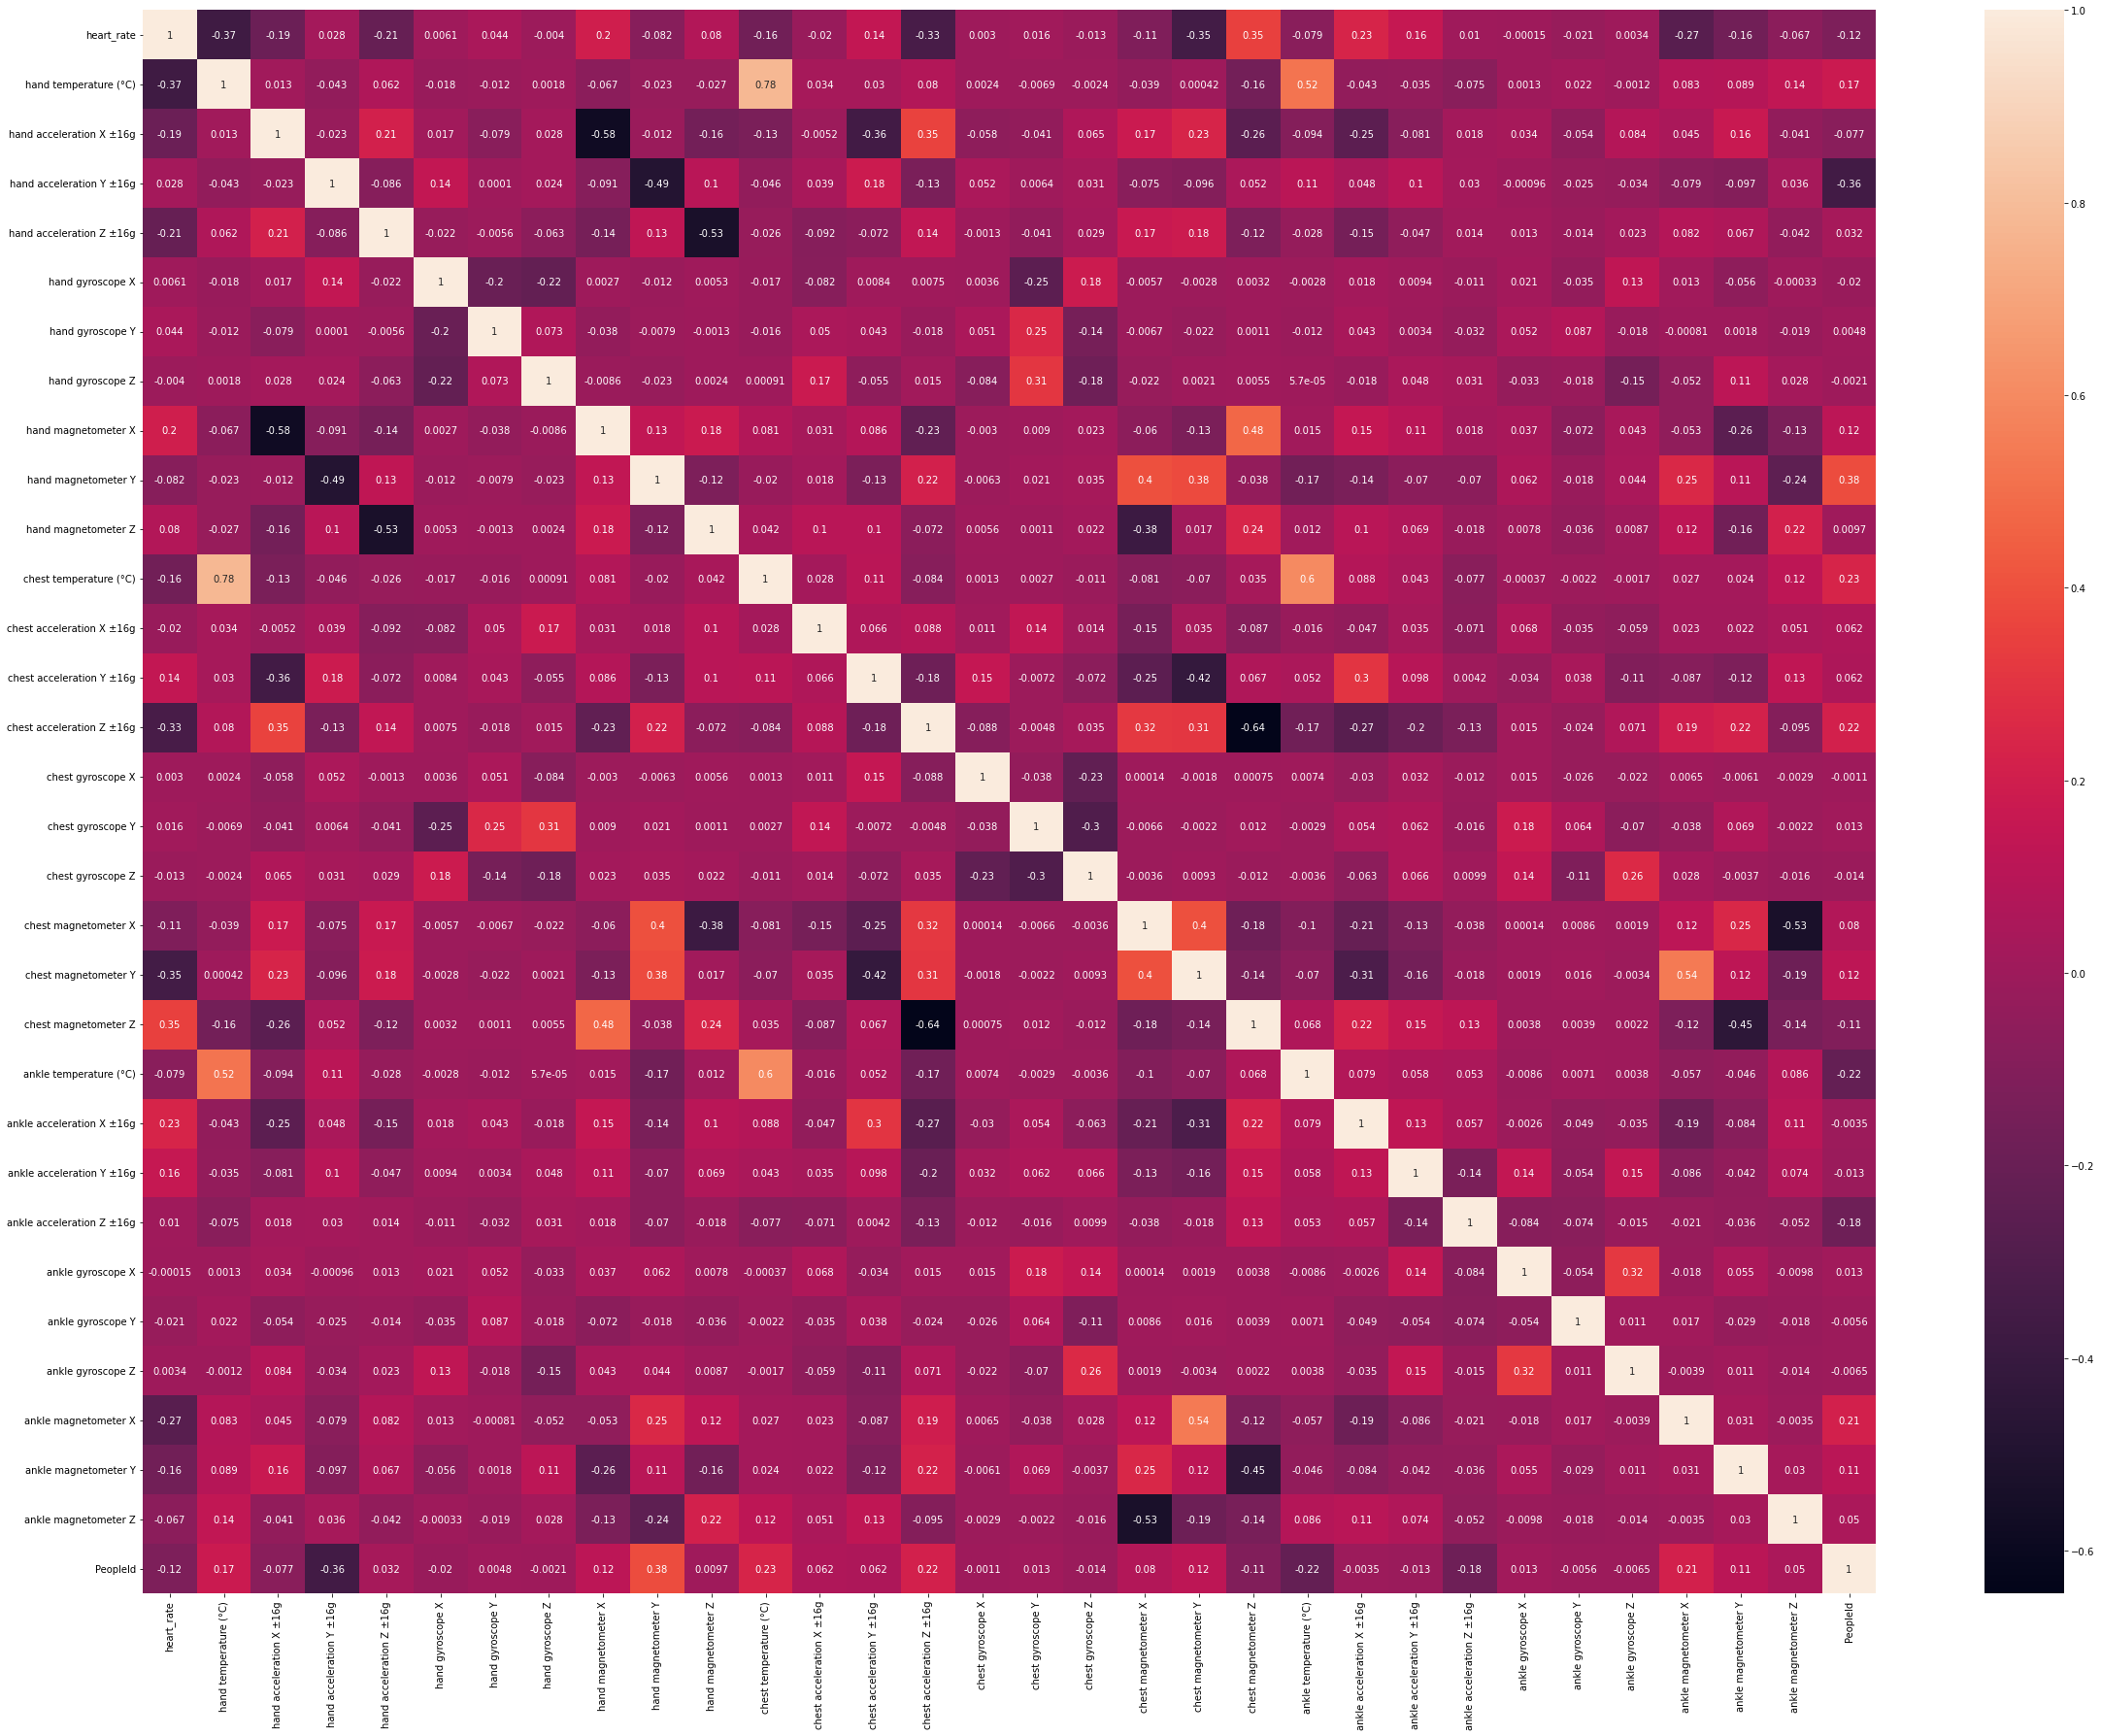

In [22]:
#Correlation Heatmap plot of whole dataset
# Plot correlation matrix in heatmap
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(40, 30))
sns.heatmap(dataset.corr(), ax=ax, annot=True)
plt.show()

# Data visualization
Some other visualizations of features to get more insights
Density plots of numerical features

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplo

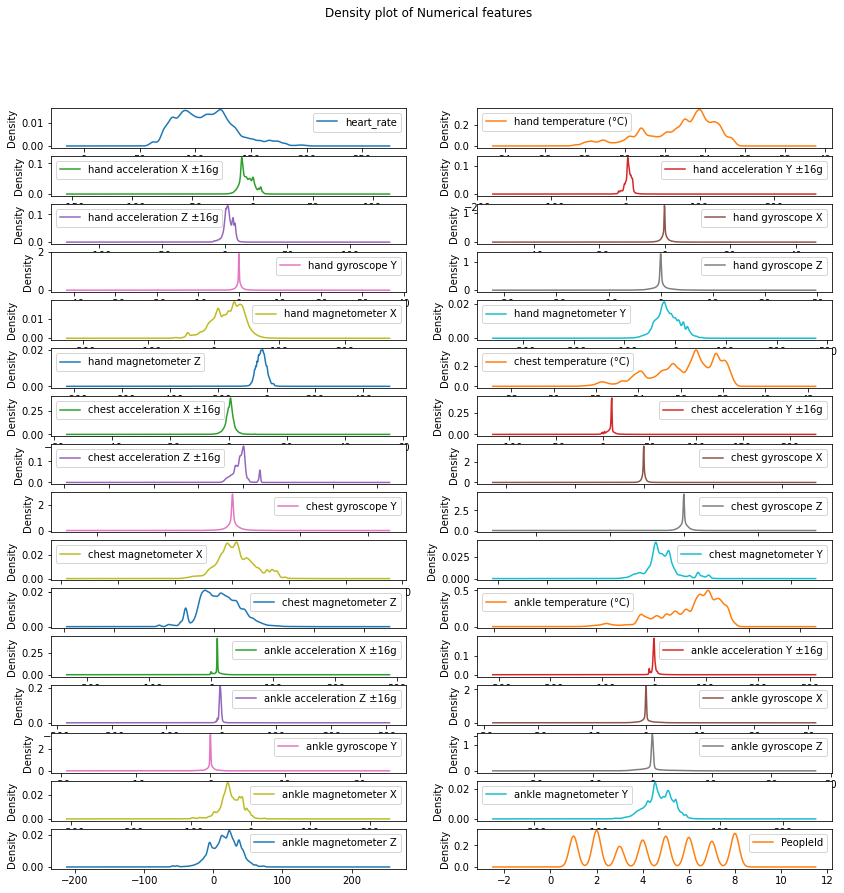

In [23]:
numerical_data.plot(kind='density',figsize=(14,14),subplots=True,layout=(16,2),title="Density plot of Numerical features",sharex=False)

# Data Preprocessing

# Checking for missing values

In [24]:
dataset.isnull().sum()

activityID                   0
heart_rate                   9
hand temperature (°C)        0
hand acceleration X ±16g     0
hand acceleration Y ±16g     0
hand acceleration Z ±16g     0
hand gyroscope X             0
hand gyroscope Y             0
hand gyroscope Z             0
hand magnetometer X          0
hand magnetometer Y          0
hand magnetometer Z          0
chest temperature (°C)       0
chest acceleration X ±16g    0
chest acceleration Y ±16g    0
chest acceleration Z ±16g    0
chest gyroscope X            0
chest gyroscope Y            0
chest gyroscope Z            0
chest magnetometer X         0
chest magnetometer Y         0
chest magnetometer Z         0
ankle temperature (°C)       0
ankle acceleration X ±16g    0
ankle acceleration Y ±16g    0
ankle acceleration Z ±16g    0
ankle gyroscope X            0
ankle gyroscope Y            0
ankle gyroscope Z            0
ankle magnetometer X         0
ankle magnetometer Y         0
ankle magnetometer Z         0
PeopleId

Initializing the SimpleImputer object with the 'mean' strategy. The 'mean' strategy will replace missing values with the mean of the non-missing values in the "heart_rate" column.

In [25]:
# Initialize the SimpleImputer with 'mean' strategy
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [26]:
# Fit and transform the 'heart_rate' column to fill missing values
dataset['heart_rate'] = imputer.fit_transform(dataset[['heart_rate']])

In [27]:
# Check the number of missing values after imputation
missing_values_after_imputation = dataset['heart_rate'].isnull().sum()
print(f"Number of missing values after imputation: {missing_values_after_imputation}")

Number of missing values after imputation: 0


# Outlier Detection

In [28]:
dataset.columns

Index(['activityID', 'heart_rate', 'hand temperature (°C)',
       'hand acceleration X ±16g', 'hand acceleration Y ±16g',
       'hand acceleration Z ±16g', 'hand gyroscope X', 'hand gyroscope Y',
       'hand gyroscope Z', 'hand magnetometer X', 'hand magnetometer Y',
       'hand magnetometer Z', 'chest temperature (°C)',
       'chest acceleration X ±16g', 'chest acceleration Y ±16g',
       'chest acceleration Z ±16g', 'chest gyroscope X', 'chest gyroscope Y',
       'chest gyroscope Z', 'chest magnetometer X', 'chest magnetometer Y',
       'chest magnetometer Z', 'ankle temperature (°C)',
       'ankle acceleration X ±16g', 'ankle acceleration Y ±16g',
       'ankle acceleration Z ±16g', 'ankle gyroscope X', 'ankle gyroscope Y',
       'ankle gyroscope Z', 'ankle magnetometer X', 'ankle magnetometer Y',
       'ankle magnetometer Z', 'PeopleId'],
      dtype='object')

# Z - Score Method

In [29]:
# Define a function to detect outliers using Z-score
def find_outliers_zscore(dataset, threshold=3):
    z_scores = np.abs((dataset - dataset.mean()) / dataset.std())
    return z_scores > threshold

In [30]:
# Find outliers in all columns (except the 'activityID' and 'PeopleId' columns if they exist)
outliers_all_columns = dataset.drop(columns=['activityID', 'PeopleId']).apply(find_outliers_zscore)


In [31]:
# Show the rows where any column has an outlier
outliers_rows = outliers_all_columns.any(axis=1)
outliers_detected = dataset[outliers_rows]

In [32]:
# Get the index of potential outliers
potential_outliers_index = outliers_detected.index

In [33]:
potential_outliers_index

Int64Index([     2,      4,      9,     11,     18,     21,     25,     27,
                29,     31,
            ...
            357978, 357984, 357985, 357987, 357988, 357990, 357994, 357997,
            358002, 358004],
           dtype='int64', length=80294)

In [34]:
# Remove the potential outliers from the original DataFrame
df_cleaned = dataset.drop(index=potential_outliers_index)

In [35]:
df_cleaned

,activityID,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,...,ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z,PeopleId
0,descending stairs,116.0,32.688,-7.333,5.259,3.184,-0.925,0.561,1.067,30.603,...,9.906,1.313,-1.196,-0.002,0.686,-0.650,-70.820,7.961,25.829,4
1,transient activities,117.0,30.688,1.850,9.751,0.189,-0.029,-0.147,0.024,-10.642,...,9.612,-1.908,-1.719,0.008,-0.010,0.019,-54.017,12.794,5.848,2
3,sitting,93.0,32.625,-7.913,4.096,4.103,-0.007,0.015,-0.026,-2.096,...,9.115,0.999,-3.942,-0.003,-0.053,-0.013,-85.338,38.258,16.031,1
5,standing,71.0,32.500,-5.420,8.450,1.047,-0.329,-0.021,0.013,13.660,...,9.757,0.146,-2.271,0.039,-0.032,0.012,-0.257,-6.031,10.917,7
6,transient activities,136.0,31.438,-11.887,3.339,5.124,-1.048,-0.779,1.312,36.271,...,6.811,5.665,-1.641,1.111,-1.387,-2.204,-23.470,29.357,15.182,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358000,standing,93.0,34.000,-9.212,2.909,1.740,-0.003,-0.043,-0.088,29.827,...,9.735,-1.228,-1.452,-0.007,0.035,-0.006,-19.741,0.780,38.984,2
358001,ironing,90.0,34.000,-10.149,-7.392,7.341,-1.898,-0.073,0.823,12.710,...,10.177,-0.087,-1.918,0.083,-0.047,0.012,-35.478,10.754,42.686,6
358003,cycling,104.0,28.875,-6.589,0.243,7.138,-0.172,0.053,-0.027,51.066,...,9.445,2.297,-0.474,0.005,0.045,0.006,-31.580,-19.911,13.376,4
358005,transient activities,93.0,34.438,-9.832,3.023,1.268,1.157,-0.354,-0.948,35.211,...,9.792,-0.310,-2.268,-0.051,0.092,-0.111,-46.006,18.509,-5.544,2


In [36]:
# After removing outliers and storing the cleaned DataFrame in 'df_cleaned'
# Reset the index of the DataFrame
df_cleaned.reset_index(drop=True, inplace=True)

In [37]:
df_cleaned

,activityID,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,...,ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z,PeopleId
0,descending stairs,116.0,32.688,-7.333,5.259,3.184,-0.925,0.561,1.067,30.603,...,9.906,1.313,-1.196,-0.002,0.686,-0.650,-70.820,7.961,25.829,4
1,transient activities,117.0,30.688,1.850,9.751,0.189,-0.029,-0.147,0.024,-10.642,...,9.612,-1.908,-1.719,0.008,-0.010,0.019,-54.017,12.794,5.848,2
2,sitting,93.0,32.625,-7.913,4.096,4.103,-0.007,0.015,-0.026,-2.096,...,9.115,0.999,-3.942,-0.003,-0.053,-0.013,-85.338,38.258,16.031,1
3,standing,71.0,32.500,-5.420,8.450,1.047,-0.329,-0.021,0.013,13.660,...,9.757,0.146,-2.271,0.039,-0.032,0.012,-0.257,-6.031,10.917,7
4,transient activities,136.0,31.438,-11.887,3.339,5.124,-1.048,-0.779,1.312,36.271,...,6.811,5.665,-1.641,1.111,-1.387,-2.204,-23.470,29.357,15.182,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277708,standing,93.0,34.000,-9.212,2.909,1.740,-0.003,-0.043,-0.088,29.827,...,9.735,-1.228,-1.452,-0.007,0.035,-0.006,-19.741,0.780,38.984,2
277709,ironing,90.0,34.000,-10.149,-7.392,7.341,-1.898,-0.073,0.823,12.710,...,10.177,-0.087,-1.918,0.083,-0.047,0.012,-35.478,10.754,42.686,6
277710,cycling,104.0,28.875,-6.589,0.243,7.138,-0.172,0.053,-0.027,51.066,...,9.445,2.297,-0.474,0.005,0.045,0.006,-31.580,-19.911,13.376,4
277711,transient activities,93.0,34.438,-9.832,3.023,1.268,1.157,-0.354,-0.948,35.211,...,9.792,-0.310,-2.268,-0.051,0.092,-0.111,-46.006,18.509,-5.544,2


# Label Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cleaned['activityID'] = le.fit_transform(df_cleaned['activityID'])

In [39]:
df_cleaned

,activityID,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,...,ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z,PeopleId
0,3,116.0,32.688,-7.333,5.259,3.184,-0.925,0.561,1.067,30.603,...,9.906,1.313,-1.196,-0.002,0.686,-0.650,-70.820,7.961,25.829,4
1,10,117.0,30.688,1.850,9.751,0.189,-0.029,-0.147,0.024,-10.642,...,9.612,-1.908,-1.719,0.008,-0.010,0.019,-54.017,12.794,5.848,2
2,8,93.0,32.625,-7.913,4.096,4.103,-0.007,0.015,-0.026,-2.096,...,9.115,0.999,-3.942,-0.003,-0.053,-0.013,-85.338,38.258,16.031,1
3,9,71.0,32.500,-5.420,8.450,1.047,-0.329,-0.021,0.013,13.660,...,9.757,0.146,-2.271,0.039,-0.032,0.012,-0.257,-6.031,10.917,7
4,10,136.0,31.438,-11.887,3.339,5.124,-1.048,-0.779,1.312,36.271,...,6.811,5.665,-1.641,1.111,-1.387,-2.204,-23.470,29.357,15.182,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277708,9,93.0,34.000,-9.212,2.909,1.740,-0.003,-0.043,-0.088,29.827,...,9.735,-1.228,-1.452,-0.007,0.035,-0.006,-19.741,0.780,38.984,2
277709,4,90.0,34.000,-10.149,-7.392,7.341,-1.898,-0.073,0.823,12.710,...,10.177,-0.087,-1.918,0.083,-0.047,0.012,-35.478,10.754,42.686,6
277710,2,104.0,28.875,-6.589,0.243,7.138,-0.172,0.053,-0.027,51.066,...,9.445,2.297,-0.474,0.005,0.045,0.006,-31.580,-19.911,13.376,4
277711,10,93.0,34.438,-9.832,3.023,1.268,1.157,-0.354,-0.948,35.211,...,9.792,-0.310,-2.268,-0.051,0.092,-0.111,-46.006,18.509,-5.544,2


# Min Max Scaling

In [40]:
x = df_cleaned.drop('activityID',axis=1)

In [41]:
y = df_cleaned['activityID']

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
# Create the MinMaxScaler object
scaler = MinMaxScaler()

In [44]:
# Fit and transform the data to perform Min-Max scaling
x_scaled = scaler.fit_transform(x)

In [45]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [46]:
x_scaled.head()

,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,hand magnetometer Y,...,ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z,PeopleId
0,0.453,0.651,0.434,0.545,0.500,0.382,0.600,0.623,0.566,0.407,...,0.510,0.535,0.559,0.499,0.702,0.441,0.164,0.549,0.574,0.429
1,0.461,0.403,0.690,0.666,0.369,0.497,0.467,0.503,0.279,0.316,...,0.502,0.456,0.535,0.500,0.507,0.501,0.312,0.586,0.410,0.143
2,0.276,0.643,0.418,0.514,0.540,0.500,0.497,0.498,0.338,0.261,...,0.487,0.527,0.430,0.499,0.495,0.498,0.036,0.783,0.494,0.000
3,0.107,0.628,0.488,0.631,0.407,0.458,0.490,0.502,0.448,0.377,...,0.506,0.507,0.509,0.505,0.501,0.501,0.787,0.441,0.452,0.857
4,0.606,0.496,0.308,0.494,0.585,0.366,0.348,0.651,0.605,0.517,...,0.419,0.642,0.538,0.672,0.122,0.300,0.582,0.714,0.487,0.286


# Principal Component Analysis

In [47]:
x_scaled.columns

Index(['heart_rate', 'hand temperature (°C)', 'hand acceleration X ±16g',
       'hand acceleration Y ±16g', 'hand acceleration Z ±16g',
       'hand gyroscope X', 'hand gyroscope Y', 'hand gyroscope Z',
       'hand magnetometer X', 'hand magnetometer Y', 'hand magnetometer Z',
       'chest temperature (°C)', 'chest acceleration X ±16g',
       'chest acceleration Y ±16g', 'chest acceleration Z ±16g',
       'chest gyroscope X', 'chest gyroscope Y', 'chest gyroscope Z',
       'chest magnetometer X', 'chest magnetometer Y', 'chest magnetometer Z',
       'ankle temperature (°C)', 'ankle acceleration X ±16g',
       'ankle acceleration Y ±16g', 'ankle acceleration Z ±16g',
       'ankle gyroscope X', 'ankle gyroscope Y', 'ankle gyroscope Z',
       'ankle magnetometer X', 'ankle magnetometer Y', 'ankle magnetometer Z',
       'PeopleId'],
      dtype='object')

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca=PCA(n_components=0.97)
pca.fit(x_scaled)

PCA(n_components=0.97)

In [50]:
x_pca=pca.transform(x_scaled)

In [51]:
x_pca.shape

(277713, 27)

In [52]:
x_pca=pd.DataFrame(x_pca)

In [53]:
x_pca.columns

RangeIndex(start=0, stop=27, step=1)

In [54]:
original_column_names = ['heart_rate', 'hand temperature (°C)', 'hand acceleration X ±16g',
       'hand acceleration Y ±16g', 'hand acceleration Z ±16g',
       'hand gyroscope X', 'hand gyroscope Y', 'hand gyroscope Z',
       'hand magnetometer X', 'hand magnetometer Y', 'hand magnetometer Z',
       'chest temperature (°C)', 'chest acceleration X ±16g',
       'chest acceleration Y ±16g', 'chest acceleration Z ±16g',
       'chest gyroscope X', 'chest gyroscope Y', 'chest gyroscope Z',
       'chest magnetometer X', 'chest magnetometer Y', 'chest magnetometer Z',
       'ankle temperature (°C)', 'ankle acceleration X ±16g',
       'ankle acceleration Y ±16g', 'ankle acceleration Z ±16g',
       'ankle gyroscope X', 'ankle gyroscope Y', 'ankle gyroscope Z',
       'ankle magnetometer X', 'ankle magnetometer Y', 'ankle magnetometer Z',
       'PeopleId']

# Mapping indices to column names
pca_column_names = [original_column_names[i] for i in range(len(x_pca.columns))]

# Display the PCA column names
print(pca_column_names)


['heart_rate', 'hand temperature (°C)', 'hand acceleration X ±16g', 'hand acceleration Y ±16g', 'hand acceleration Z ±16g', 'hand gyroscope X', 'hand gyroscope Y', 'hand gyroscope Z', 'hand magnetometer X', 'hand magnetometer Y', 'hand magnetometer Z', 'chest temperature (°C)', 'chest acceleration X ±16g', 'chest acceleration Y ±16g', 'chest acceleration Z ±16g', 'chest gyroscope X', 'chest gyroscope Y', 'chest gyroscope Z', 'chest magnetometer X', 'chest magnetometer Y', 'chest magnetometer Z', 'ankle temperature (°C)', 'ankle acceleration X ±16g', 'ankle acceleration Y ±16g', 'ankle acceleration Z ±16g', 'ankle gyroscope X', 'ankle gyroscope Y']


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

# Modelling using different Algorithms

# Logistic Regression model

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [58]:
# Train the Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, y_train)

C:\Users\yedhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [59]:
# Make predictions on the test set
lr_y_pred = lr_model.predict(x_test)

In [60]:
# Evaluate the model
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, lr_y_pred))
print(classification_report(y_test, lr_y_pred))

Logistic Regression:
Accuracy: 0.7215490700898403
              precision    recall  f1-score   support

           0       0.65      0.32      0.43      3158
           1       0.64      0.34      0.45      2063
           2       0.87      0.91      0.89      3697
           3       0.54      0.12      0.20      1486
           4       0.81      0.86      0.84      5529
           5       0.99      0.95      0.97      4017
           6       0.80      0.45      0.57       314
           7       0.89      0.54      0.67       305
           8       0.83      0.86      0.84      4592
           9       0.74      0.74      0.74      4363
          10       0.62      0.78      0.69     18553
          11       0.76      0.65      0.70      3482
          12       0.65      0.49      0.56      3984

    accuracy                           0.72     55543
   macro avg       0.75      0.62      0.66     55543
weighted avg       0.72      0.72      0.71     55543



# Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [63]:
# Make predictions on the test set
dt_y_pred = dt_model.predict(x_test)


In [64]:
# Evaluate the model
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, dt_y_pred))
print(classification_report(y_test, dt_y_pred))

Decision Tree:
Accuracy: 0.875339826800857
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      3158
           1       0.63      0.62      0.63      2063
           2       0.93      0.93      0.93      3697
           3       0.54      0.52      0.53      1486
           4       0.93      0.94      0.93      5529
           5       0.99      0.99      0.99      4017
           6       0.82      0.74      0.78       314
           7       0.73      0.75      0.74       305
           8       0.98      0.97      0.98      4592
           9       0.95      0.96      0.95      4363
          10       0.87      0.88      0.87     18553
          11       0.81      0.79      0.80      3482
          12       0.82      0.81      0.82      3984

    accuracy                           0.88     55543
   macro avg       0.83      0.82      0.83     55543
weighted avg       0.87      0.88      0.87     55543



# Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:
# Make predictions on the test set
rf_y_pred = rf_model.predict(x_test)

In [68]:
# Evaluate the model
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

Random Forest:
Accuracy: 0.9566101939038223
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3158
           1       0.95      0.78      0.86      2063
           2       0.99      0.98      0.99      3697
           3       0.97      0.59      0.73      1486
           4       0.98      0.99      0.98      5529
           5       1.00      0.99      1.00      4017
           6       0.98      0.83      0.90       314
           7       0.99      0.87      0.92       305
           8       1.00      0.99      0.99      4592
           9       0.99      0.99      0.99      4363
          10       0.91      0.98      0.94     18553
          11       0.98      0.92      0.95      3482
          12       0.97      0.94      0.95      3984

    accuracy                           0.96     55543
   macro avg       0.98      0.91      0.94     55543
weighted avg       0.96      0.96      0.96     55543



# KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
# create an empty list.
metric_k=[]
neighbors=np.arange(3,15)

In [71]:
# Train the KNN model
for k in neighbors:
  knn_model=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  knn_model.fit(x_train,y_train)
  # Make predictions on the test set
  knn_y_pred=knn_model.predict(x_test)
  acc=accuracy_score(y_test,knn_y_pred)
  metric_k.append(acc)

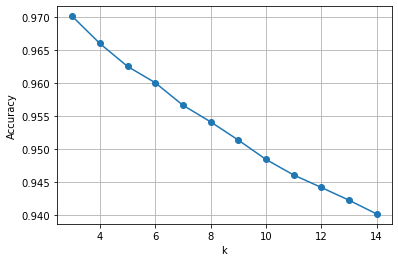

In [72]:
# Lets plot a graph to find highest accuracy score of given k
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

In [73]:
# Lets create knn model for 3 neighbors
knn_model=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn_model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [74]:
# Make predictions on the test set
knn_y_pred=knn_model.predict(x_test)

In [75]:
# Evaluate the model
print("KNN Model:")
print("Accuracy:", accuracy_score(y_test, knn_y_pred))
print(classification_report(y_test, knn_y_pred))

KNN Model:
Accuracy: 0.970077237455665
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3158
           1       0.91      0.90      0.91      2063
           2       0.99      1.00      0.99      3697
           3       0.90      0.84      0.87      1486
           4       0.98      0.99      0.99      5529
           5       1.00      0.99      0.99      4017
           6       0.94      0.92      0.93       314
           7       0.98      0.93      0.95       305
           8       1.00      0.99      1.00      4592
           9       0.99      0.99      0.99      4363
          10       0.97      0.96      0.96     18553
          11       0.98      0.97      0.97      3482
          12       0.92      0.98      0.95      3984

    accuracy                           0.97     55543
   macro avg       0.96      0.96      0.96     55543
weighted avg       0.97      0.97      0.97     55543



# SVM Model

In [76]:
from sklearn.svm import SVC
svm_model=SVC(kernel='linear')
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [77]:
# Make predictions on the test set
svm_y_pred=svm_model.predict(x_test)

In [78]:
# Evaluate the model
print("SVM Model:")
print("Accuracy:", accuracy_score(y_test, svm_y_pred))
print(classification_report(y_test, svm_y_pred))

SVM Model:
Accuracy: 0.7295968888968907
              precision    recall  f1-score   support

           0       0.75      0.15      0.25      3158
           1       0.57      0.07      0.12      2063
           2       0.89      0.93      0.91      3697
           3       0.65      0.02      0.04      1486
           4       0.84      0.89      0.86      5529
           5       0.98      0.95      0.97      4017
           6       0.97      0.37      0.54       314
           7       0.94      0.52      0.67       305
           8       0.87      0.88      0.88      4592
           9       0.79      0.81      0.80      4363
          10       0.60      0.85      0.70     18553
          11       0.85      0.62      0.72      3482
          12       0.75      0.48      0.58      3984

    accuracy                           0.73     55543
   macro avg       0.80      0.58      0.62     55543
weighted avg       0.75      0.73      0.70     55543



When comparing 5 models, accuracy is higher for KNN-model.

# Hyperparameter tuning for KNN model

Randomsearch CV

In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
param_dist = {
    'n_neighbors': range(3, 15),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [81]:
# perform randomized search cv
random_search = RandomizedSearchCV(
    knn_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings to sample
    cv=2,       # Cross-validation folds
    random_state=42
)

random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=2,
                   estimator=KNeighborsClassifier(metric='euclidean',
                                                  n_neighbors=3),
                   param_distributions={'n_neighbors': range(3, 15),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42)

In [82]:
# Print best parameters
print("Best parameters:", random_search.best_params_)

Best parameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 4}


In [83]:
# Make predictions
best_knn = random_search.best_estimator_

predictions = best_knn.predict(x_test)

In [84]:
# Evaluate the model
print("Randomsearch Model:")
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Randomsearch Model:
Accuracy: 0.9659543056730822
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3158
           1       0.88      0.92      0.90      2063
           2       0.99      1.00      0.99      3697
           3       0.87      0.85      0.86      1486
           4       0.97      1.00      0.98      5529
           5       1.00      0.99      0.99      4017
           6       0.93      0.94      0.93       314
           7       0.95      0.94      0.95       305
           8       0.99      0.99      0.99      4592
           9       0.98      0.99      0.99      4363
          10       0.97      0.95      0.96     18553
          11       0.98      0.95      0.96      3482
          12       0.93      0.97      0.95      3984

    accuracy                           0.97     55543
   macro avg       0.95      0.96      0.96     55543
weighted avg       0.97      0.97      0.97     55543



Accuracy is similar to the original model.

# Saving the model to disk

In [86]:
import pickle
pickle.dump(knn_model,open('knn_model.pkl','wb'))